In [26]:
#Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount
#How different is the amount of money used in different transaction classes?
#Do fraudulent transactions occur more often during certain frames?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [2]:
#Exploratory Data Analysis — EDA
pd.set_option("display.float", "{:.2f}".format)

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [3]:
#Let us now check the missing values in the dataset
data.isnull().sum().sum()

0

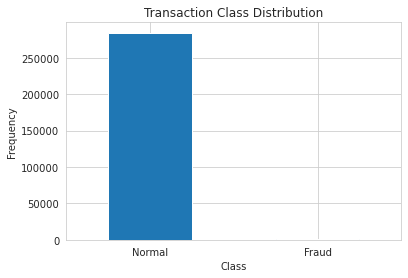

In [4]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this DataFrame 
# as the base for our predictive models and analysis, we might get a lot of errors, and our algorithms will 
# probably overfit since they will “assume” that most transactions are not a fraud. But we don’t want our model 
# to assume, we want our model to detect patterns that give signs of fraud!
# Determine the number of fraud and valid transactions in the entire dataset.
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [7]:
# How different is the amount of money used in different transaction classes?
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,122.21,88.29
std,256.68,250.11
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,2125.87,25691.16


In [8]:
# Do fraudulent transactions occur more often during a certain time frame?
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


/home/linuxdeepa.my.lan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/linuxdeepa.my.lan/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


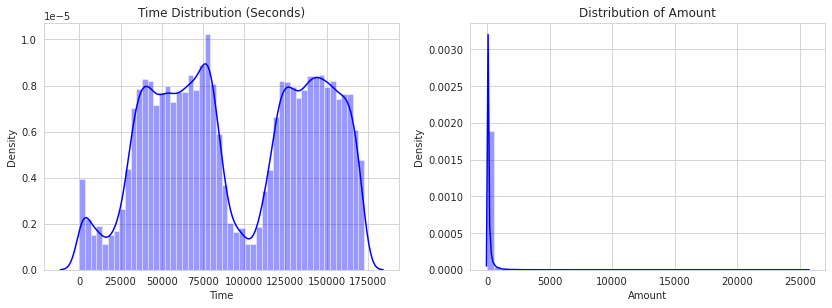

In [9]:
# Now let us take a sample of the dataset for our modeling and prediction.
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(data['Time'], color='blue');

# plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

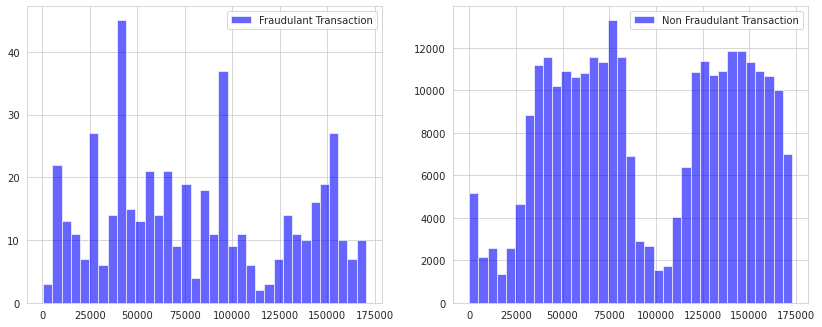

In [10]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction"
)
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(
  bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction"
)
plt.legend()

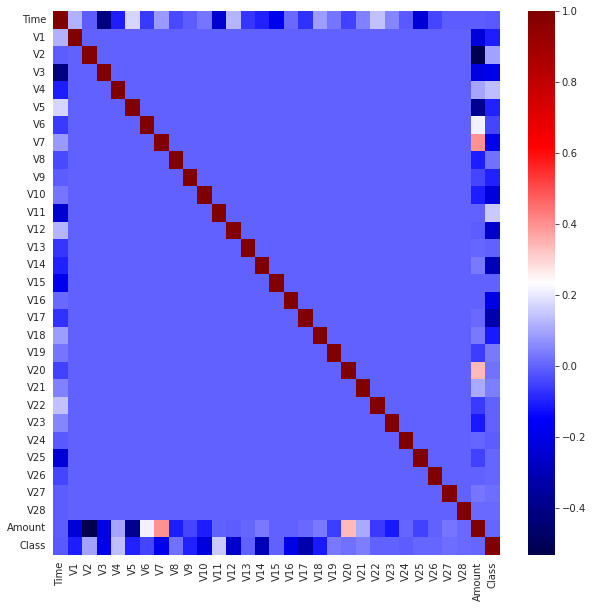

In [11]:
# heatmap to find any high correlations
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

In [12]:
# Data Pre-processing
# Time and Amount should be scaled as the other columns.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [13]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [16]:
# Model Building
# Artificial Neural Networks (ANNs)
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)
score = model.evaluate(X_test, y_test)
print(score)

2023-06-05 17:20:12.008792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 17:20:17.817697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-05 17:20:17.817763: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-05 17:20:18.641520: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-05 17:20:37.835440: W tensorflow/stream_executor/platform/de

Epoch 1/300
78/78 [==============================] - 24s 194ms/step - loss: 0.8055 - fn: 75.0000 - fp: 73718.0000 - tn: 85486.0000 - tp: 212.0000 - precision: 0.0029 - recall: 0.7387 - val_loss: 0.6017 - val_fn: 10.0000 - val_fp: 1745.0000 - val_tn: 38059.0000 - val_tp: 59.0000 - val_precision: 0.0327 - val_recall: 0.8551
Epoch 2/300
78/78 [==============================] - 14s 184ms/step - loss: 0.6921 - fn: 45.0000 - fp: 62124.0000 - tn: 97080.0000 - tp: 242.0000 - precision: 0.0039 - recall: 0.8432 - val_loss: 0.5198 - val_fn: 11.0000 - val_fp: 544.0000 - val_tn: 39260.0000 - val_tp: 58.0000 - val_precision: 0.0963 - val_recall: 0.8406
Epoch 3/300
78/78 [==============================] - 13s 161ms/step - loss: 0.6170 - fn: 36.0000 - fp: 49990.0000 - tn: 109214.0000 - tp: 251.0000 - precision: 0.0050 - recall: 0.8746 - val_loss: 0.4729 - val_fn: 11.0000 - val_fp: 281.0000 - val_tn: 39523.0000 - val_tp: 58.0000 - val_precision: 0.1711 - val_recall: 0.8406
Epoch 4/300
78/78 [==========

Epoch 52/300
78/78 [==============================] - 12s 153ms/step - loss: 0.0095 - fn: 89.0000 - fp: 43.0000 - tn: 159161.0000 - tp: 198.0000 - precision: 0.8216 - recall: 0.6899 - val_loss: 0.0092 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 53/300
78/78 [==============================] - 12s 156ms/step - loss: 0.0107 - fn: 94.0000 - fp: 48.0000 - tn: 159156.0000 - tp: 193.0000 - precision: 0.8008 - recall: 0.6725 - val_loss: 0.0100 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 54/300
78/78 [==============================] - 12s 155ms/step - loss: 0.0086 - fn: 81.0000 - fp: 41.0000 - tn: 159163.0000 - tp: 206.0000 - precision: 0.8340 - recall: 0.7178 - val_loss: 0.0096 - val_fn: 13.0000 - val_fp: 14.0000 - val_tn: 39790.0000 - val_tp: 56.0000 - val_precision: 0.8000 - val_recall: 0.8116
Epoch 55/300
78/78 [=================

Epoch 103/300
78/78 [==============================] - 15s 187ms/step - loss: 0.0034 - fn: 74.0000 - fp: 26.0000 - tn: 159178.0000 - tp: 213.0000 - precision: 0.8912 - recall: 0.7422 - val_loss: 0.0041 - val_fn: 14.0000 - val_fp: 9.0000 - val_tn: 39795.0000 - val_tp: 55.0000 - val_precision: 0.8594 - val_recall: 0.7971
Epoch 104/300
78/78 [==============================] - 13s 161ms/step - loss: 0.0032 - fn: 74.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 213.0000 - precision: 0.9342 - recall: 0.7422 - val_loss: 0.0041 - val_fn: 17.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 52.0000 - val_precision: 0.8814 - val_recall: 0.7536
Epoch 105/300
78/78 [==============================] - 15s 193ms/step - loss: 0.0033 - fn: 73.0000 - fp: 22.0000 - tn: 159182.0000 - tp: 214.0000 - precision: 0.9068 - recall: 0.7456 - val_loss: 0.0042 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 106/300
78/78 [================

78/78 [==============================] - 15s 190ms/step - loss: 0.0022 - fn: 63.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 224.0000 - precision: 0.9333 - recall: 0.7805 - val_loss: 0.0043 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 154/300
78/78 [==============================] - 13s 166ms/step - loss: 0.0019 - fn: 54.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 233.0000 - precision: 0.9320 - recall: 0.8118 - val_loss: 0.0040 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 155/300
78/78 [==============================] - 11s 146ms/step - loss: 0.0021 - fn: 56.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 231.0000 - precision: 0.9545 - recall: 0.8049 - val_loss: 0.0041 - val_fn: 13.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 56.0000 - val_precision: 0.8750 - val_recall: 0.8116
Epoch 156/300
78/78 [==============================

Epoch 179/300
78/78 [==============================] - 13s 164ms/step - loss: 0.0016 - fn: 49.0000 - fp: 16.0000 - tn: 159188.0000 - tp: 238.0000 - precision: 0.9370 - recall: 0.8293 - val_loss: 0.0043 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 180/300
78/78 [==============================] - 12s 159ms/step - loss: 0.0018 - fn: 49.0000 - fp: 12.0000 - tn: 159192.0000 - tp: 238.0000 - precision: 0.9520 - recall: 0.8293 - val_loss: 0.0044 - val_fn: 14.0000 - val_fp: 8.0000 - val_tn: 39796.0000 - val_tp: 55.0000 - val_precision: 0.8730 - val_recall: 0.7971
Epoch 181/300
78/78 [==============================] - 13s 170ms/step - loss: 0.0016 - fn: 46.0000 - fp: 17.0000 - tn: 159187.0000 - tp: 241.0000 - precision: 0.9341 - recall: 0.8397 - val_loss: 0.0044 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 182/300
78/78 [================

Epoch 230/300
78/78 [==============================] - 12s 155ms/step - loss: 0.0011 - fn: 36.0000 - fp: 9.0000 - tn: 159195.0000 - tp: 251.0000 - precision: 0.9654 - recall: 0.8746 - val_loss: 0.0051 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 231/300
78/78 [==============================] - 12s 147ms/step - loss: 0.0013 - fn: 36.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 251.0000 - precision: 0.9580 - recall: 0.8746 - val_loss: 0.0052 - val_fn: 13.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 56.0000 - val_precision: 0.8889 - val_recall: 0.8116
Epoch 232/300
78/78 [==============================] - 14s 186ms/step - loss: 0.0012 - fn: 36.0000 - fp: 15.0000 - tn: 159189.0000 - tp: 251.0000 - precision: 0.9436 - recall: 0.8746 - val_loss: 0.0050 - val_fn: 14.0000 - val_fp: 7.0000 - val_tn: 39797.0000 - val_tp: 55.0000 - val_precision: 0.8871 - val_recall: 0.7971
Epoch 233/300
78/78 [=================

78/78 [==============================] - 13s 167ms/step - loss: 9.3645e-04 - fn: 28.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 259.0000 - precision: 0.9593 - recall: 0.9024 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 56.0000 - val_precision: 0.9180 - val_recall: 0.8116
Epoch 281/300
78/78 [==============================] - 12s 155ms/step - loss: 9.4885e-04 - fn: 34.0000 - fp: 11.0000 - tn: 159193.0000 - tp: 253.0000 - precision: 0.9583 - recall: 0.8815 - val_loss: 0.0055 - val_fn: 13.0000 - val_fp: 6.0000 - val_tn: 39798.0000 - val_tp: 56.0000 - val_precision: 0.9032 - val_recall: 0.8116
Epoch 282/300
78/78 [==============================] - 12s 150ms/step - loss: 0.0010 - fn: 27.0000 - fp: 6.0000 - tn: 159198.0000 - tp: 260.0000 - precision: 0.9774 - recall: 0.9059 - val_loss: 0.0054 - val_fn: 13.0000 - val_fp: 5.0000 - val_tn: 39799.0000 - val_tp: 56.0000 - val_precision: 0.9180 - val_recall: 0.8116
Epoch 283/300
78/78 [=======================

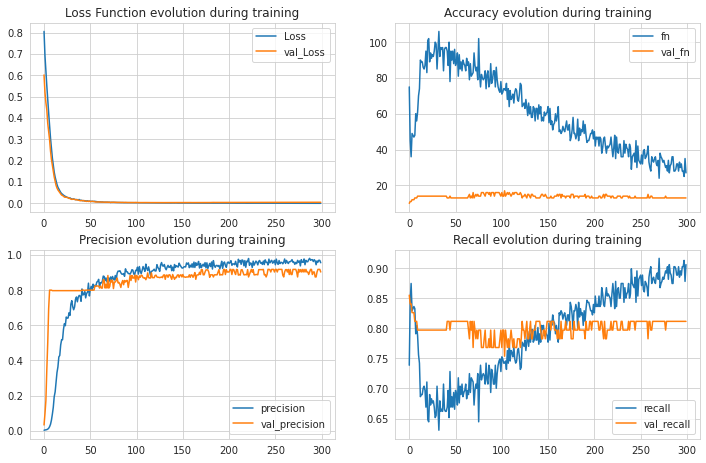

In [17]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 14s 5ms/step
Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   0.94      1.00       0.97          1.00
f1-score       1.00   0.97      1.00       0.98          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [    18    269]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.92      1.00       0.96          1.00
recall        1.00   0.81      1.00       0.90          1.00
f1-score      1.00   0.86      1.00       0.93          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
________

In [22]:
# XGBoost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

/home/linuxdeepa.my.lan/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.95      1.00       0.97          1.00
recall        1.00   0.82      1.00       0.91          1.00
f1-score      1.00   0.88      1.00       0.94          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   1.00      1.00       1.00          1.00
recall         1.00   1.00      1.00       1.00          1.00
f1-score       1.00   1.00      1.00       1.00          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.91      1.00       0.95          1.00
recall        1.00   0.79      1.00       0.89          1.00
f1-score      1.00   0.84      1.00       0.92          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix:

In [30]:
#catBoost
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Learning rate set to 0.089847
0:	learn: 0.3914982	total: 233ms	remaining: 3m 52s
1:	learn: 0.2368377	total: 373ms	remaining: 3m 5s
2:	learn: 0.1341780	total: 527ms	remaining: 2m 55s
3:	learn: 0.0788514	total: 647ms	remaining: 2m 41s
4:	learn: 0.0482949	total: 806ms	remaining: 2m 40s
5:	learn: 0.0315325	total: 969ms	remaining: 2m 40s
6:	learn: 0.0213628	total: 1.15s	remaining: 2m 43s
7:	learn: 0.0153604	total: 1.28s	remaining: 2m 39s
8:	learn: 0.0115137	total: 1.44s	remaining: 2m 38s
9:	learn: 0.0090128	total: 1.57s	remaining: 2m 35s
10:	learn: 0.0071550	total: 1.69s	remaining: 2m 31s
11:	learn: 0.0060638	total: 1.82s	remaining: 2m 29s
12:	learn: 0.0052453	total: 1.94s	remaining: 2m 26s
13:	learn: 0.0046542	total: 2.05s	remaining: 2m 24s
14:	learn: 0.0042229	total: 2.16s	remaining: 2m 21s
15:	learn: 0.0038780	total: 2.29s	remaining: 2m 20s
16:	learn: 0.0036112	total: 2.44s	remaining: 2m 21s
17:	learn: 0.0034152	total: 2.55s	remaining: 2m 18s
18:	learn: 0.0032510	total: 2.65s	remaining: 

158:	learn: 0.0012358	total: 21.7s	remaining: 1m 54s
159:	learn: 0.0012341	total: 21.8s	remaining: 1m 54s
160:	learn: 0.0012326	total: 21.9s	remaining: 1m 54s
161:	learn: 0.0012291	total: 22.1s	remaining: 1m 54s
162:	learn: 0.0012280	total: 22.2s	remaining: 1m 54s
163:	learn: 0.0012266	total: 22.3s	remaining: 1m 53s
164:	learn: 0.0012199	total: 22.5s	remaining: 1m 53s
165:	learn: 0.0012135	total: 22.6s	remaining: 1m 53s
166:	learn: 0.0012109	total: 22.7s	remaining: 1m 53s
167:	learn: 0.0012013	total: 22.8s	remaining: 1m 52s
168:	learn: 0.0011997	total: 22.9s	remaining: 1m 52s
169:	learn: 0.0011975	total: 23s	remaining: 1m 52s
170:	learn: 0.0011950	total: 23.2s	remaining: 1m 52s
171:	learn: 0.0011937	total: 23.3s	remaining: 1m 52s
172:	learn: 0.0011858	total: 23.4s	remaining: 1m 51s
173:	learn: 0.0011818	total: 23.5s	remaining: 1m 51s
174:	learn: 0.0011801	total: 23.6s	remaining: 1m 51s
175:	learn: 0.0011772	total: 23.7s	remaining: 1m 51s
176:	learn: 0.0011728	total: 23.9s	remaining: 1m

316:	learn: 0.0007709	total: 42.3s	remaining: 1m 31s
317:	learn: 0.0007676	total: 42.4s	remaining: 1m 30s
318:	learn: 0.0007661	total: 42.5s	remaining: 1m 30s
319:	learn: 0.0007636	total: 42.6s	remaining: 1m 30s
320:	learn: 0.0007630	total: 42.8s	remaining: 1m 30s
321:	learn: 0.0007616	total: 42.9s	remaining: 1m 30s
322:	learn: 0.0007583	total: 43s	remaining: 1m 30s
323:	learn: 0.0007534	total: 43.2s	remaining: 1m 30s
324:	learn: 0.0007525	total: 43.3s	remaining: 1m 29s
325:	learn: 0.0007492	total: 43.4s	remaining: 1m 29s
326:	learn: 0.0007478	total: 43.5s	remaining: 1m 29s
327:	learn: 0.0007457	total: 43.8s	remaining: 1m 29s
328:	learn: 0.0007442	total: 44.1s	remaining: 1m 29s
329:	learn: 0.0007434	total: 44.2s	remaining: 1m 29s
330:	learn: 0.0007414	total: 44.5s	remaining: 1m 29s
331:	learn: 0.0007400	total: 44.7s	remaining: 1m 29s
332:	learn: 0.0007381	total: 44.9s	remaining: 1m 29s
333:	learn: 0.0007363	total: 45.1s	remaining: 1m 29s
334:	learn: 0.0007345	total: 45.2s	remaining: 1m

473:	learn: 0.0004570	total: 1m 3s	remaining: 1m 10s
474:	learn: 0.0004566	total: 1m 3s	remaining: 1m 10s
475:	learn: 0.0004558	total: 1m 3s	remaining: 1m 10s
476:	learn: 0.0004554	total: 1m 3s	remaining: 1m 9s
477:	learn: 0.0004552	total: 1m 3s	remaining: 1m 9s
478:	learn: 0.0004549	total: 1m 3s	remaining: 1m 9s
479:	learn: 0.0004512	total: 1m 4s	remaining: 1m 9s
480:	learn: 0.0004504	total: 1m 4s	remaining: 1m 9s
481:	learn: 0.0004488	total: 1m 4s	remaining: 1m 9s
482:	learn: 0.0004466	total: 1m 4s	remaining: 1m 8s
483:	learn: 0.0004459	total: 1m 4s	remaining: 1m 8s
484:	learn: 0.0004454	total: 1m 4s	remaining: 1m 8s
485:	learn: 0.0004421	total: 1m 4s	remaining: 1m 8s
486:	learn: 0.0004407	total: 1m 4s	remaining: 1m 8s
487:	learn: 0.0004385	total: 1m 4s	remaining: 1m 8s
488:	learn: 0.0004377	total: 1m 5s	remaining: 1m 7s
489:	learn: 0.0004375	total: 1m 5s	remaining: 1m 7s
490:	learn: 0.0004369	total: 1m 5s	remaining: 1m 7s
491:	learn: 0.0004358	total: 1m 5s	remaining: 1m 7s
492:	lear

631:	learn: 0.0002849	total: 1m 23s	remaining: 48.5s
632:	learn: 0.0002844	total: 1m 23s	remaining: 48.4s
633:	learn: 0.0002835	total: 1m 23s	remaining: 48.3s
634:	learn: 0.0002834	total: 1m 23s	remaining: 48.2s
635:	learn: 0.0002818	total: 1m 23s	remaining: 48s
636:	learn: 0.0002809	total: 1m 24s	remaining: 47.9s
637:	learn: 0.0002806	total: 1m 24s	remaining: 47.7s
638:	learn: 0.0002803	total: 1m 24s	remaining: 47.6s
639:	learn: 0.0002799	total: 1m 24s	remaining: 47.5s
640:	learn: 0.0002780	total: 1m 24s	remaining: 47.4s
641:	learn: 0.0002776	total: 1m 24s	remaining: 47.2s
642:	learn: 0.0002745	total: 1m 24s	remaining: 47.1s
643:	learn: 0.0002744	total: 1m 24s	remaining: 46.9s
644:	learn: 0.0002731	total: 1m 25s	remaining: 46.8s
645:	learn: 0.0002730	total: 1m 25s	remaining: 46.7s
646:	learn: 0.0002720	total: 1m 25s	remaining: 46.5s
647:	learn: 0.0002718	total: 1m 25s	remaining: 46.4s
648:	learn: 0.0002705	total: 1m 25s	remaining: 46.2s
649:	learn: 0.0002695	total: 1m 25s	remaining: 4

788:	learn: 0.0001831	total: 1m 42s	remaining: 27.5s
789:	learn: 0.0001828	total: 1m 43s	remaining: 27.4s
790:	learn: 0.0001825	total: 1m 43s	remaining: 27.3s
791:	learn: 0.0001822	total: 1m 43s	remaining: 27.1s
792:	learn: 0.0001819	total: 1m 43s	remaining: 27s
793:	learn: 0.0001806	total: 1m 43s	remaining: 26.9s
794:	learn: 0.0001805	total: 1m 43s	remaining: 26.7s
795:	learn: 0.0001802	total: 1m 43s	remaining: 26.6s
796:	learn: 0.0001800	total: 1m 43s	remaining: 26.5s
797:	learn: 0.0001798	total: 1m 44s	remaining: 26.3s
798:	learn: 0.0001790	total: 1m 44s	remaining: 26.2s
799:	learn: 0.0001767	total: 1m 44s	remaining: 26.1s
800:	learn: 0.0001764	total: 1m 44s	remaining: 25.9s
801:	learn: 0.0001759	total: 1m 44s	remaining: 25.8s
802:	learn: 0.0001758	total: 1m 44s	remaining: 25.7s
803:	learn: 0.0001755	total: 1m 44s	remaining: 25.5s
804:	learn: 0.0001754	total: 1m 44s	remaining: 25.4s
805:	learn: 0.0001751	total: 1m 44s	remaining: 25.3s
806:	learn: 0.0001746	total: 1m 45s	remaining: 2

944:	learn: 0.0001359	total: 2m 1s	remaining: 7.07s
945:	learn: 0.0001358	total: 2m 1s	remaining: 6.94s
946:	learn: 0.0001357	total: 2m 1s	remaining: 6.81s
947:	learn: 0.0001355	total: 2m 1s	remaining: 6.68s
948:	learn: 0.0001355	total: 2m 1s	remaining: 6.55s
949:	learn: 0.0001353	total: 2m 1s	remaining: 6.42s
950:	learn: 0.0001347	total: 2m 2s	remaining: 6.29s
951:	learn: 0.0001345	total: 2m 2s	remaining: 6.16s
952:	learn: 0.0001344	total: 2m 2s	remaining: 6.03s
953:	learn: 0.0001340	total: 2m 2s	remaining: 5.9s
954:	learn: 0.0001338	total: 2m 2s	remaining: 5.77s
955:	learn: 0.0001335	total: 2m 2s	remaining: 5.64s
956:	learn: 0.0001332	total: 2m 2s	remaining: 5.51s
957:	learn: 0.0001330	total: 2m 2s	remaining: 5.38s
958:	learn: 0.0001324	total: 2m 2s	remaining: 5.25s
959:	learn: 0.0001323	total: 2m 2s	remaining: 5.12s
960:	learn: 0.0001321	total: 2m 3s	remaining: 5s
961:	learn: 0.0001321	total: 2m 3s	remaining: 4.87s
962:	learn: 0.0001319	total: 2m 3s	remaining: 4.74s
963:	learn: 0.00

In [33]:
#LightGBM
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = lgbm_clf.predict(X_train)
y_test_pred = lgbm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['LigthGBM'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.79%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision      1.00   0.44      1.00       0.72          1.00
recall         1.00   0.61      1.00       0.80          1.00
f1-score       1.00   0.51      1.00       0.75          1.00
support   159204.00 287.00      1.00  159491.00     159491.00
_______________________________________________
Confusion Matrix: 
 [[158980    224]
 [   113    174]]

Test Result:
Accuracy Score: 99.69%
_______________________________________________
Classification Report:
                 0      1  accuracy  macro avg  weighted avg
precision     1.00   0.27      1.00       0.64          1.00
recall        1.00   0.57      1.00       0.79          1.00
f1-score      1.00   0.37      1.00       0.68          1.00
support   85307.00 136.00      1.00   85443.00      85443.00
_______________________________________________
Confusion Matrix: 

<AxesSubplot:>

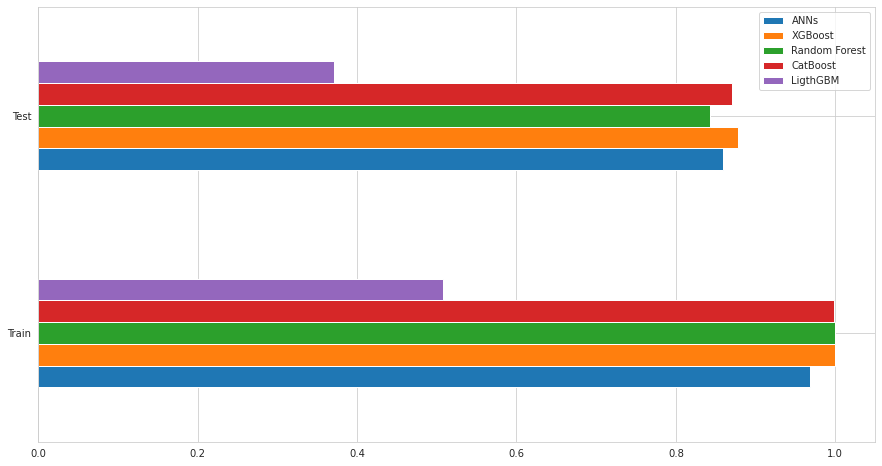

In [34]:
#Model comparision
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))

In [ ]:
Conclusions:
We learned how to develop our credit card fraud detection model using machine learning. We used a variety of ML algorithms, including ANNs and Tree-based models. At the end of the training, out of 85443 validation transaction, XGBoost performs better than other models:

Correctly identifying 111 of them as fraudulent
Missing 9 fraudulent transactions
At the cost of incorrectly flagging 25 legitimate transactions
